In [1]:
import os
from PIL import Image
from dataset import Nyang_Dataset
from dataloader import Nyang_DataLoader
import matplotlib.pyplot as plt
import math

In [10]:
class Mnist_CustomDataset(Nyang_Dataset):

    def __init__(self, root_dir, transform=None):
        super().__init__(transform=transform)
        
        self.data = []
        self.labels = []
        self.root_dir = root_dir

        for label in range(10):
            class_dir = os.path.join(self.root_dir, str(label))
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.data.append(image_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data[idx]
        label = self.labels[idx]
        
        # 이미지 로드
        image = Image.open(image_path)

        # transform 적용
        if self.transform:
            image = self.transform(image)
            
        return image, label 
    

In [ ]:
    def __init__(self, root_dir, transform=None):
        super().__init__(transform=transform)
        
        self.data = []
        self.labels = []
        self.root_dir = root_dir

        for label in range(10):
            class_dir = os.path.join(self.root_dir, str(label))
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.data.append(image_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data[idx]
        label = self.labels[idx]
        
        # 이미지 로드
        image = Image.open(image_path)

        # transform 적용
        if self.transform:
            image = self.transform(image)
            
        return image, label 
    

In [6]:
# 데이터셋 생성
train_dataset = Mnist_CustomDataset(root_dir='mnist_data/train')
test_dataset = Mnist_CustomDataset(root_dir='mnist_data/test')

# 데이터 로더 생성
train_loader = Nyang_DataLoader(dataset=train_dataset, batch_size=32, shuffle=False)
test_loader = Nyang_DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


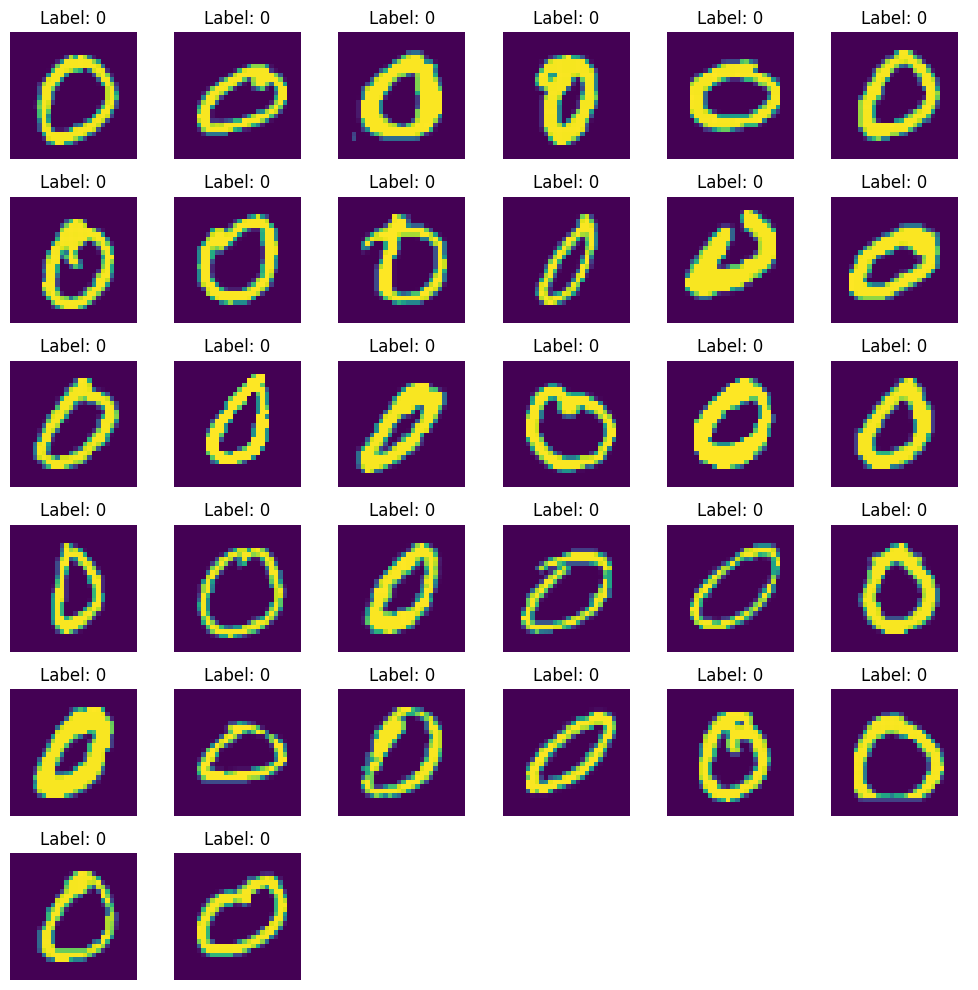

In [7]:
# 첫 번째 배치 데이터 확인
for images, labels in train_loader:
    # 배치 내의 이미지 수
    batch_size = len(images)

    # 이미지의 제곱근을 기반으로 그리드 크기를 결정 (예: 32 -> 6x6 그리드)
    grid_size = math.ceil(math.sqrt(batch_size))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // grid_size, i % grid_size]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')  # 축 정보 제거

    # 남은 서브플롯에 대한 표시 제거
    for i in range(batch_size, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')
    
    plt.tight_layout()
    plt.show()
    break